### Imports

In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_fscore_support
import matplotlib.pyplot as plt
import seaborn as sns

### Load the dataset

In [64]:
data = pd.read_csv('elephantidae.csv')

## Data Cleaning and Selection

### Columns to keep for the model

In [65]:
columns_to_keep = [
    'latitude', 'longitude', 'observed_on', 'iconic_taxon_name', 
    'taxon_kingdom_name', 'taxon_phylum_name', 'taxon_class_name',
    'taxon_order_name', 'taxon_family_name', 'taxon_genus_name', 'taxon_species_name'
]
data = data[columns_to_keep]

### Drop rows with missing values


In [66]:
data.dropna(inplace=True)

### Convert 'observed_on' to a datetime object and extract features like year, month, and day

In [67]:
data['observed_on'] = pd.to_datetime(data['observed_on'], errors='coerce')
data['year'] = data['observed_on'].dt.year
data['month'] = data['observed_on'].dt.month
data['day'] = data['observed_on'].dt.day

data.drop(columns=['observed_on'], inplace=True)

### Encode categorical variables


In [68]:
categorical_columns = [
    'iconic_taxon_name', 'taxon_kingdom_name', 'taxon_phylum_name', 
    'taxon_class_name', 'taxon_order_name', 'taxon_family_name', 'taxon_genus_name'
]
data = pd.get_dummies(data, columns=categorical_columns)

### Define the target variable and features

In [69]:
target = 'taxon_species_name'
X = data.drop(columns=[target])
y = data[target]

## Model Prediction Selection

### Split the data into training and testing setsé

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Train and Evaluate Multiple Models

In [71]:
models = {
    'Random Forest': RandomForestClassifier(random_state=42, max_depth=5, n_estimators=50),
    'Logistic Regression': LogisticRegression(max_iter=500, random_state=42, class_weight='balanced', C=0.5),
    'Support Vector Machine': SVC(random_state=42, class_weight='balanced', C=0.5, kernel='linear'),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=10),
    'Decision Tree': DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_split=10)
}

### Test all the models on the test set

Training Random Forest...
Random Forest Accuracy: 0.99
Random Forest Precision: 0.99, Recall: 0.99, F1 Score: 0.99
                    precision    recall  f1-score   support

   Elephas maximus       1.00      1.00      1.00       420
Loxodonta africana       0.99      1.00      0.99      2049
Loxodonta cyclotis       0.97      0.58      0.72        52

          accuracy                           0.99      2521
         macro avg       0.99      0.86      0.91      2521
      weighted avg       0.99      0.99      0.99      2521



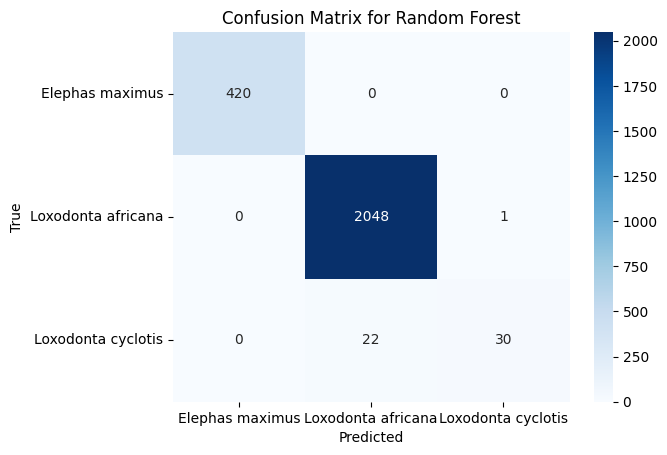

Training Logistic Regression...
Logistic Regression Accuracy: 0.97
Logistic Regression Precision: 0.99, Recall: 0.97, F1 Score: 0.97
                    precision    recall  f1-score   support

   Elephas maximus       1.00      1.00      1.00       420
Loxodonta africana       1.00      0.96      0.98      2049
Loxodonta cyclotis       0.38      0.98      0.55        52

          accuracy                           0.97      2521
         macro avg       0.79      0.98      0.84      2521
      weighted avg       0.99      0.97      0.97      2521



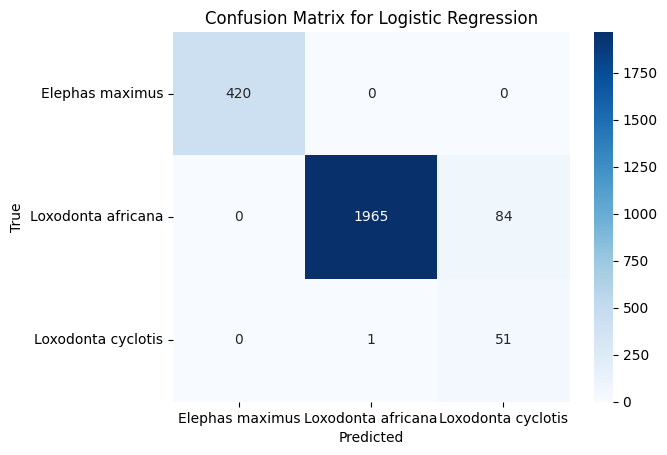

Training Support Vector Machine...
Support Vector Machine Accuracy: 0.96
Support Vector Machine Precision: 0.99, Recall: 0.96, F1 Score: 0.97
                    precision    recall  f1-score   support

   Elephas maximus       1.00      1.00      1.00       420
Loxodonta africana       1.00      0.95      0.97      2049
Loxodonta cyclotis       0.33      1.00      0.50        52

          accuracy                           0.96      2521
         macro avg       0.78      0.98      0.82      2521
      weighted avg       0.99      0.96      0.97      2521



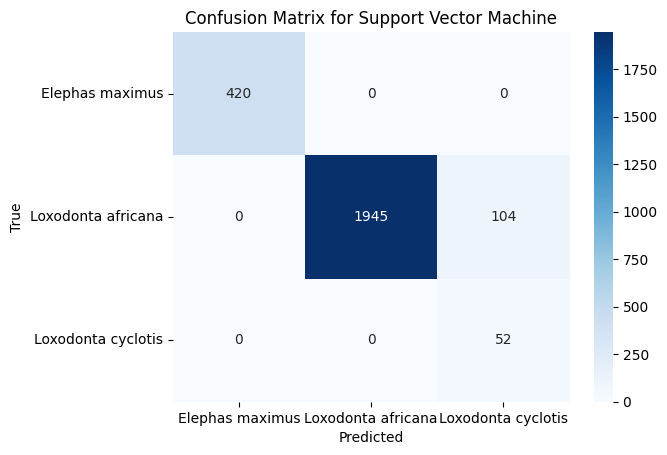

Training K-Nearest Neighbors...
K-Nearest Neighbors Accuracy: 1.00
K-Nearest Neighbors Precision: 1.00, Recall: 1.00, F1 Score: 1.00
                    precision    recall  f1-score   support

   Elephas maximus       1.00      1.00      1.00       420
Loxodonta africana       1.00      1.00      1.00      2049
Loxodonta cyclotis       1.00      0.81      0.89        52

          accuracy                           1.00      2521
         macro avg       1.00      0.94      0.96      2521
      weighted avg       1.00      1.00      1.00      2521



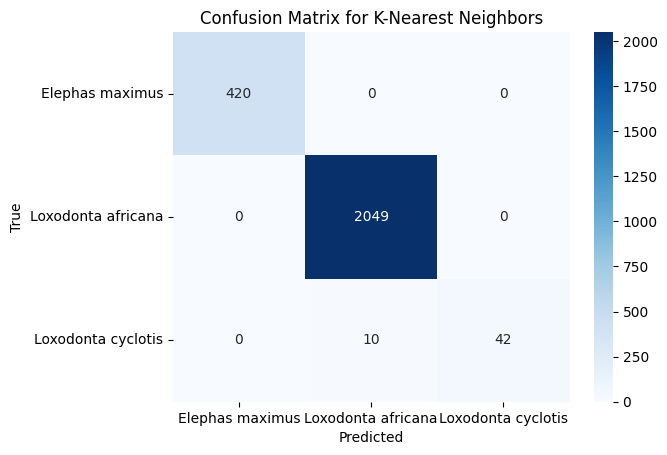

Training Decision Tree...
Decision Tree Accuracy: 1.00
Decision Tree Precision: 1.00, Recall: 1.00, F1 Score: 1.00
                    precision    recall  f1-score   support

   Elephas maximus       1.00      1.00      1.00       420
Loxodonta africana       1.00      1.00      1.00      2049
Loxodonta cyclotis       0.94      0.88      0.91        52

          accuracy                           1.00      2521
         macro avg       0.98      0.96      0.97      2521
      weighted avg       1.00      1.00      1.00      2521



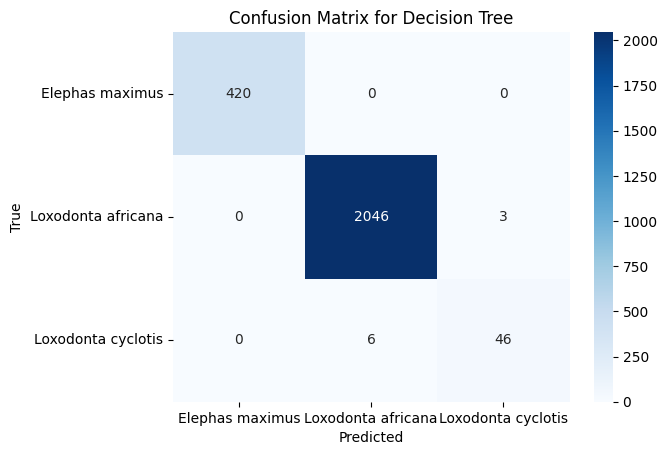

In [72]:
results = {}

for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
    results[model_name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    }

    print(f"{model_name} Accuracy: {accuracy:.2f}")
    print(f"{model_name} Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}")
    print(classification_report(y_test, y_pred))

    # Display confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

### Rank the models based on their performance

In [73]:
sorted_results = sorted(results.items(), key=lambda x: x[1]['accuracy'], reverse=True)
print("\nModel Rankings:")
for rank, (model_name, scores) in enumerate(sorted_results, 1):
    print(f"{rank}. {model_name}: Accuracy={scores['accuracy']:.2f}, Precision={scores['precision']:.2f}, Recall={scores['recall']:.2f}, F1 Score={scores['f1_score']:.2f}")


Model Rankings:
1. Decision Tree: Accuracy=1.00, Precision=1.00, Recall=1.00, F1 Score=1.00
2. K-Nearest Neighbors: Accuracy=1.00, Precision=1.00, Recall=1.00, F1 Score=1.00
3. Random Forest: Accuracy=0.99, Precision=0.99, Recall=0.99, F1 Score=0.99
4. Logistic Regression: Accuracy=0.97, Precision=0.99, Recall=0.97, F1 Score=0.97
5. Support Vector Machine: Accuracy=0.96, Precision=0.99, Recall=0.96, F1 Score=0.97


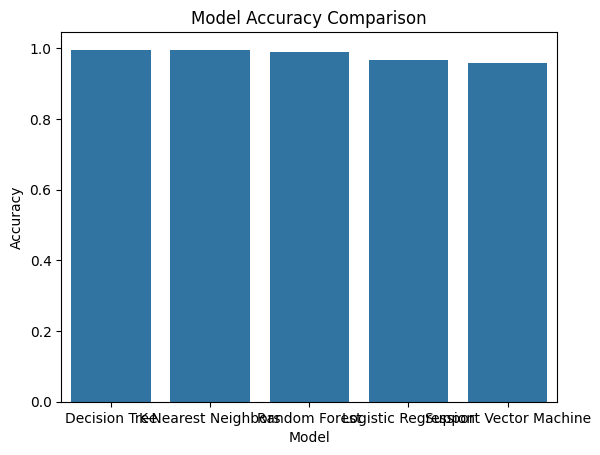

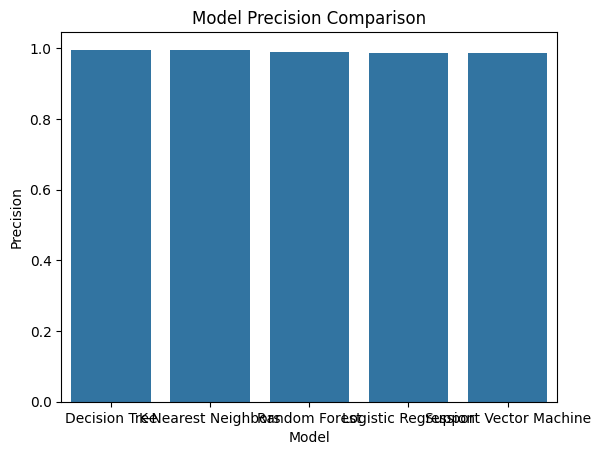

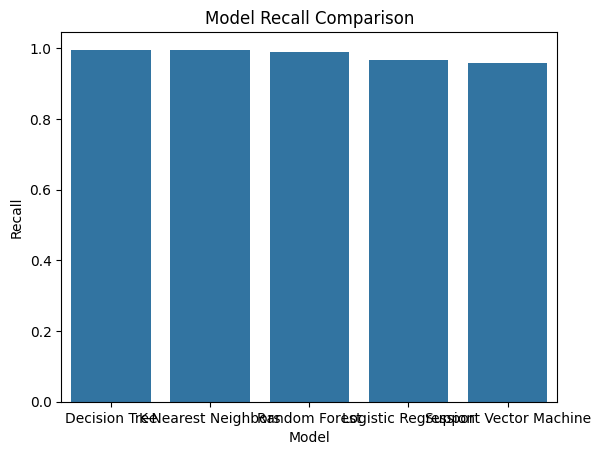

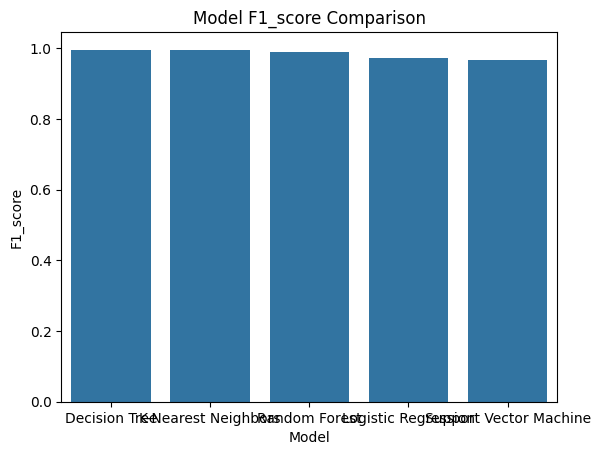

In [74]:
metrics = ['accuracy', 'precision', 'recall', 'f1_score']
for metric in metrics:
    sns.barplot(x=[name for name, _ in sorted_results], y=[scores[metric] for _, scores in sorted_results])
    plt.title(f'Model {metric.capitalize()} Comparison')
    plt.ylabel(metric.capitalize())
    plt.xlabel('Model')
    plt.show()


## Test the best model with datas

In [75]:
best_model_name, best_model_scores = sorted_results[0]
best_model = models[best_model_name]
print(f"\nBest Model: {best_model_name}")


Best Model: Decision Tree


### Data Test

In [76]:
new_test_data = pd.DataFrame({
    'latitude': [-25.7461, -24.6544, 7.8731, 3.2028, 6.9271, -28.4793, -29.4653, 1.3521, 13.0827, 15.8700],
    'longitude': [28.1881, 25.9088, 80.7718, 101.5586, 79.8612, 24.6654, 31.0355, 103.8198, 80.2707, 100.9925],
    'year': [2025]*10,
    'month': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'day': [15, 20, 5, 10, 25, 30, 12, 18, 22, 27],
    # Add dummy encoded columns for categorical variables with the same structure as training data
    **{col: [0]*10 for col in X.columns if col.startswith(('iconic_taxon_name_', 'taxon_'))}
})

### Prediction test

In [77]:
new_predictions = best_model.predict(new_test_data)
new_test_data['Predicted Species'] = new_predictions
print("\nPredictions on New Test Data:")
print(new_test_data[['latitude', 'longitude', 'year', 'month', 'day', 'Predicted Species']])


Predictions on New Test Data:
   latitude  longitude  year  month  day Predicted Species
0  -25.7461    28.1881  2025      1   15   Elephas maximus
1  -24.6544    25.9088  2025      2   20   Elephas maximus
2    7.8731    80.7718  2025      3    5   Elephas maximus
3    3.2028   101.5586  2025      4   10   Elephas maximus
4    6.9271    79.8612  2025      5   25   Elephas maximus
5  -28.4793    24.6654  2025      6   30   Elephas maximus
6  -29.4653    31.0355  2025      7   12   Elephas maximus
7    1.3521   103.8198  2025      8   18   Elephas maximus
8   13.0827    80.2707  2025      9   22   Elephas maximus
9   15.8700   100.9925  2025     10   27   Elephas maximus
